In [1]:
print("hello")

hello


In [23]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp # gives us keypoints

In [3]:
!pip3 install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 578.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 13.6 MB/s eta 0:00:0000:0100:01


In [5]:
!pip3 install matplotlib numpy mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.2/155.2 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 1.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 13.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 13.1 MB/s eta 0

In [24]:
mp_holistic = mp.solutions.holistic # brings the holistic model
mp_drawing = mp.solutions.drawing_utils # getting the drawing utilities

In [25]:
def mp_detection(image, model):
    # when we receive the feed from open cv it is in the BGR format and for mediapipe to be able to make a detection we need to convert it into RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # converts an input image from one color space to another
    image.flags.writeable = False # making the writeable status of our image to false
    results = model.process(image) # makes the prediction
    image.flags.writeable = True 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # Converting the color back to BGR
    return image, results

In [26]:
# this function actually just draws the keypoints on the image based on the results that we get from the mp_detection function that we get
def draw_landmarks(image, results):
    # each draw landmark function requires a frame, landmarks list and the connection map to be able to plot correct keypoints 
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [27]:
capture = cv2.VideoCapture(1) # this line effectively accesses our webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loops through the video capture as long as we are still accessing our webcam
    while capture.isOpened():
      # reads the feed
      ret, frame = capture.read()

      # make detections  
      image, results = mp_detection(frame, holistic)
      print(results)

      # draw landmarks
      draw_landmarks(image, results)

      # shows to screen
      cv2.imshow('OpenCV Feed', image)
    
      # it breaks out of our loop if we press 'q' on our keyboard
      if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    capture.release()
    cv2.destroyAllWindows()

I0000 00:00:1701559149.478533       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [28]:
len(results.face_landmarks.landmark)

468

In [29]:
draw_landmarks(frame, results)

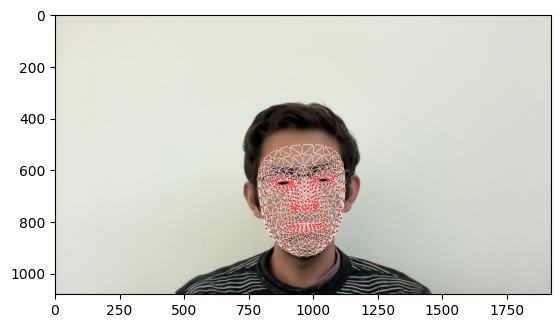

In [30]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [31]:
len(results.pose_landmarks.landmark)

33

In [32]:
# stores all keypoints in a flattened way which will be passed to the LSTM model
# since the result will only have a particular landmark if it was present in the feed at the time camera was capturing our video but if not
# then that particular landmark when accessed would give us an error, so to avoid that we are creating 4 different variables for different 
# landmarks and storing them in a flattened way if they are present else we just make an array of zeros
pose_values = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh_values = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh_values = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
rh_values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
# here we have just made it into a function and return the concatenated results
def extract_values(results):
    pose_values = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face_values = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh_values = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh_values = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose_values, face_values, lh_values, rh_values])

In [34]:
result_test = extract_values(results)
result_test

array([ 0.50911266,  0.6620363 , -1.17543077, ...,  0.        ,
        0.        ,  0.        ])

In [35]:
np.save('0', result_test) # saving each frame as a numpy array

In [36]:
np.load('0.npy')

array([ 0.50911266,  0.6620363 , -1.17543077, ...,  0.        ,
        0.        ,  0.        ])

In [37]:
DATA_PATH = os.path.join('MP_Data') # path for exported data

# actions to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# 30 vidoes worth of data
no_sequences = 30

# videos are going to be 30 frames in length so basically 30*1662 keypoints
sequence_length = 30

In [38]:
# effectively here we create a different folder for each action that is "hello, "thankyou" and "Iloveyou"
# and inside these folders we will have a folder for each sequence of action i.e since there are 30 sequences we will have subfolders with name 
# 0-29 in each of these action folders
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [39]:
capture = cv2.VideoCapture(1) # this line effectively accesses our webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loops through the video capture as long as we are still accessing our webcam
    for action in actions:
        # looping through the sequences/videos
        for sequence in range(no_sequences):
            # looping through video length/sequence length
            for frame_num in range(sequence_length):
                
                ret, frame = capture.read()

                # make detections  
                image, results = mp_detection(frame, holistic)
                print(results)
            
                # draw landmarks
                draw_landmarks(image, results)

                # apply collection logic
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLECTION', (120, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} video number {}'.format(action, sequence), (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # we extract the keypoints using the function we created above and save each frame as a numpy array in the respective folder
                # so for eg. for action "hello" in sequence "0" i.e folder 0 we will have 30 numpy arrays as .npy files from 0-29
                # SO ESSENTIALLY 30 SEQUENCES (VIDEOS) AND 30 FRAMES PER SEQUENCE (VIDEO)
                keypoints = extract_values(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # shows to screen
                cv2.imshow('OpenCV Feed', image)
      
    
                # it breaks out of our loop if we press 'q' on our keyboard
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    capture.release()
    cv2.destroyAllWindows()

I0000 00:00:1701559213.601917       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [40]:
!pip3 install scikit-learn
!pip3 install tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [41]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [42]:
# here we create two new lists to be able to work on our data better
# sequences will contain data for 90 videos that are 30 frames each where each one has 1662 keypoints
# labels will have the label for the corresponding action
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [43]:
np.array(sequences).shape # output : 90 videos, 30 frames each and each one has 1662 keypoints

(90, 30, 1662)

In [44]:
np.array(labels).shape

(90,)

In [45]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [46]:
# here we one hot encode our labels which is basically a list of numbers to a suitable format
y = to_categorical(labels).astype(int)
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
X_train.shape

(85, 30, 1662)

In [49]:
from tensorflow.keras.models import Sequential
# lSTM gives us the temporal component and allows us to build our neural network which essentially allows us to perform action detection
# also importing dense which is a normal fully connected layer
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
# this is just part of the development in which we made use of the tensor board web app to monitor our neural network
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [51]:
model = Sequential()
# 3 LSTM layers and 3 Dense layers
# when tensorflow with an LSTM layer, if we stack them together we need to return the sequences as the next layer will need them
# and the shape signifies 30 frames and 1662 keypoints
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) # softmax - returns values with probablity between 0-1 and their sum adds up to one
# the highest probability amongst them will signify which action it most likely is

# Reason behind using Mediapipe with LSTM
# During research we found that the current state of the art models use CNN layers followed by LSTM layers
# But on going down this road we found that the model gave extremely poor accuracy and wont be useful as we were trying to predict actions in real time
# So main reasons for doing this was 1. we needed less data to produce a highly accurate model 2. this one would be faster to train given that
# we are doing this project on our computers 3. it would thereby give faster detections 

In [52]:
# we now go ahead and compile our model
# we use a loss function called categorical_crossentropy as this is a multiclass classification problem
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [53]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 2s 26ms/step - loss: 7.0560 - categorical_accuracy: 0.3412
Epoch 2/2000
3/3 [==============================] - 0s 29ms/step - loss: 18.3076 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 0s 29ms/step - loss: 42.9183 - categorical_accuracy: 0.2588
Epoch 4/2000
3/3 [==============================] - 0s 33ms/step - loss: 103.6959 - categorical_accuracy: 0.4118
Epoch 5/2000
3/3 [==============================] - 0s 37ms/step - loss: 115.9782 - categorical_accuracy: 0.2941
Epoch 6/2000
3/3 [==============================] - 0s 34ms/step - loss: 174.9014 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 38ms/step - loss: 87.6973 - categorical_accuracy: 0.3647
Epoch 8/2000
3/3 [==============================] - 0s 36ms/step - loss: 58.5829 - categorical_accuracy: 0.3882
Epoch 9/2000
3/3 [==============================] - 0s 34ms/step - loss: 144.9060 - categorical_accura

In [54]:
model.summary()
# the params seen below would be in millions had we used a CNN model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596675 (2.28 MB)
Trainable params: 596675 

In [55]:
res = model.predict(X_test)
res

1/1 [==============================] - 0s 227ms/step


array([[8.6059589e-03, 9.6244854e-01, 2.8945509e-02],
       [3.6067215e-01, 1.4687327e-01, 4.9245456e-01],
       [4.4419071e-01, 4.6995528e-02, 5.0881374e-01],
       [1.1632606e-01, 6.5038449e-01, 2.3328944e-01],
       [7.0249194e-01, 6.3162005e-08, 2.9750800e-01]], dtype=float32)

In [56]:
actions[np.argmax(res[1])]

'iloveyou'

In [57]:
actions[np.argmax(y_test[1])]

'iloveyou'

In [58]:
model.save('action.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
ytemp = model.predict(X_test)

1/1 [==============================] - 0s 18ms/step


In [61]:
# this converts the predictions from their one hot encoded representation to categorical labels
ytrue = np.argmax(y_test, axis=1).tolist()
ytemp = np.argmax(ytemp, axis=1).tolist()

In [62]:
ytemp

[1, 2, 2, 1, 0]

In [63]:
ytrue

[1, 2, 2, 0, 2]

In [64]:
multilabel_confusion_matrix(ytrue, ytemp)

array([[[3, 1],
        [1, 0]],

       [[3, 1],
        [0, 1]],

       [[2, 0],
        [1, 2]]])

In [65]:
accuracy_score(ytrue, ytemp)

0.6

In [66]:
colors = [(245,117, 16), (117, 245, 16), (16, 117, 245)]
def probablity_visulaization(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [84]:
sequence = [] # once we get 30 frames in this is when we pass it to our prediction logic
sentence = [] # this concatenates our history of detections together
threshold = 0.7 # we will render a result if they are above a certain threshold

capture = cv2.VideoCapture(1) # this line effectively accesses our webcam
# set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    # loops through the video capture as long as we are still accessing our webcam
    while capture.isOpened():
      # reads the feed
      ret, frame = capture.read()

      # make detections  
      image, results = mp_detection(frame, holistic)
      print(results)
    
      # draw landmarks
      draw_landmarks(image, results)

      # prediction logic
      keypoints = extract_values(results)
      sequence.insert(0, keypoints)
      sequence = sequence[:30]

      if len(sequence) == 30:
          res = model.predict(np.expand_dims(sequence, axis=0))[0]
          print(actions[np.argmax(res)])

      # visualisation logic
      if res[np.argmax(res)] > threshold:
          if len(sentence) > 0:
              if actions[np.argmax(res)] != sentence[-1]:
                  sentence.append(actions[np.argmax(res)])
          else:
              sentence.append(actions[np.argmax(res)])
            
      if len(sentence) > 5:
          sentence = sentence[-5:]

      cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
      cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

      # shows to screen
      cv2.imshow('OpenCV Feed', image)
    
      # it breaks out of our loop if we press 'q' on our keyboard
      if cv2.waitKey(10) & 0xFF == ord('q'):
        break
    capture.release()
    cv2.destroyAllWindows()

I0000 00:00:1701642521.793478       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 86), renderer: Apple M2


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [78]:
capture.release()
cv2.destroyAllWindows()

In [79]:
res[np.argmax(res)]

array([0.36067215, 0.14687327, 0.49245456], dtype=float32)